In [1]:
import pandas as pd

raw = pd.read_csv('weddata.csv')

In [2]:
raw.head(10)

,Day,Month,Time
0,Monday,October,3 pm
1,Sunday,October,3 pm
2,Saturday,October,3 pm
3,Saturday,October,2 pm
4,Monday,September,12 pm
5,Sunday,February,3 pm
6,Friday,June,2 pm
7,Friday,December,6 pm
8,Wednesday,August,2 pm
9,Sunday,August,10 am


In [3]:
print('rows, columns = {}'.format(raw.shape))

rows, columns = (1081, 3)


In [4]:
raw.Time[0]

'3 pm'

In [5]:
import calendar
for day in calendar.day_name:
    print(day)

print('.....')

for month in calendar.month_name:
    print(month)


Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
.....

January
February
March
April
May
June
July
August
September
October
November
December


In [6]:
grouped = raw.groupby('Day')
daycounts = {}
for name, group in grouped:
#    print('{}: {}'.format(name, len(group)))
    daycounts[name] = len(group)

print(daycounts)

{'Saturday': 647, 'Monday': 29, 'Tuesday': 18, 'Friday': 186, 'Wednesday': 39, 'Thursday': 52, 'Sunday': 110}


In [7]:
m_grouped = raw.groupby('Month')
monthcounts = {}
for name, group in m_grouped:
#    print('{}: {}'.format(name, len(group)))
    monthcounts[name] = len(group)
    
print(monthcounts)

{'August': 79, 'June': 55, 'March': 88, 'October': 153, 'January': 53, 'December': 57, 'April': 123, 'February': 46, 'September': 135, 'May': 120, 'July': 65, 'November': 107}


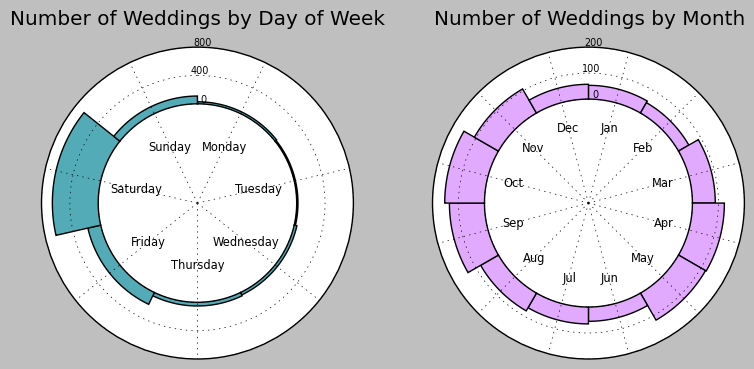

In [180]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcdefaults()

angle = 0
day_plot_name = []
day_plot_angle = []
day_plot_radius = []
angle_increment = 2 * np.pi / 7
for day in calendar.day_name:
    day_plot_name.append(day)
    day_plot_angle.append(angle)
    day_plot_radius.append(daycounts[day])
    angle = angle + angle_increment

ax = plt.subplot(121, polar=True)
bars = ax.bar(day_plot_angle, day_plot_radius, width=angle_increment, bottom=1400, color='#52ABB7')

day_plot_labels = [(rad / (2 * np.pi)) * 360 + (360 / 14) for rad in day_plot_angle]

ax.set_thetagrids(day_plot_labels, labels=day_plot_name, frac=0.4, size='x-small')
ax.set_rgrids((1400, 1800, 2200), labels=('0', '400', '800'), angle=5, ha='right', size='xx-small')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_rmax(2200)
ax.set_title('Number of Weddings by Day of Week')

m_angle = 0
month_plot_name = []
month_plot_angle = []
month_plot_radius = []
m_angle_increment = 2 * np.pi / 12
for month in calendar.month_name:
    if month == '':
        continue
    month_plot_name.append(month[0:3])
    month_plot_angle.append(m_angle)
    month_plot_radius.append(monthcounts[month])
    m_angle = m_angle + m_angle_increment

axM = plt.subplot(122, polar=True)
barsM = axM.bar(month_plot_angle, month_plot_radius, width=m_angle_increment, bottom=400, color='#E2AAFF')

month_plot_labels = [(rad / (2 * np.pi)) * 360 + (360 / 24) for rad in month_plot_angle]

axM.set_thetagrids(month_plot_labels, labels=month_plot_name, frac=0.5, size='x-small')
axM.set_rgrids((400, 500, 600), labels=('0', '100', '200'), angle=5, ha='right', size='xx-small')
axM.set_theta_direction(-1)
axM.set_theta_zero_location('N')
axM.set_rmax(600)
axM.set_title('Number of Weddings by Month')

plt.tight_layout()
plt.savefig('day_and_month.png',format='png')
#plt.show()

In [48]:
t_grouped = raw.groupby('Time')
timecounts = {}
for name, group in t_grouped:
#    print('{}: {}'.format(name, len(group)))
    timecounts[name] = len(group)
    
print(timecounts)

{'3 am': 3, '11 am': 27, '11 pm': 1, '7 am': 1, '6 am': 3, '8 am': 2, '5 pm': 68, '4 am': 2, '1 am': 2, '2 am': 2, '1 pm': 35, '8 pm': 1, '4 pm': 167, '3 pm': 538, '10 pm': 2, '2 pm': 135, '6 pm': 22, '5 am': 2, '12 am': 3, '12 pm': 24, '7 pm': 9, '9 am': 1, '10 am': 27}


In [52]:
print([i for i in range(1,13)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [55]:
'3 am'.split()

['3', 'am']

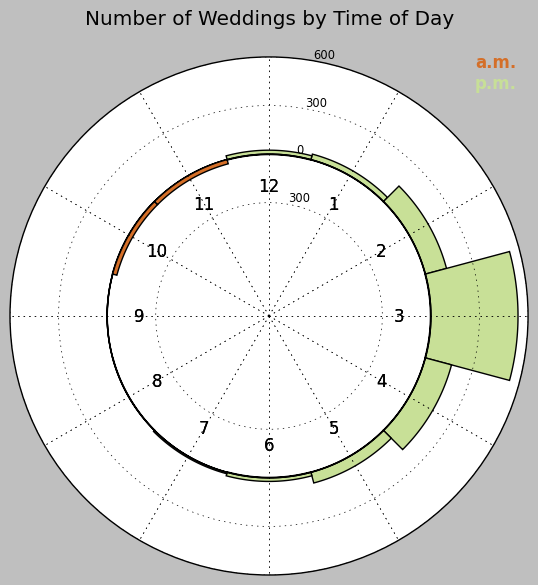

In [176]:
t_angle = 0
time_plot_name = []
time_plot_angle = []
time_plot_radius = []
t_angle_increment = 2 * np.pi / 12
for t in range(1,13):
    time_plot_name.append(t)
    time_plot_angle.append(t_angle)
    time_plot_radius.append(timecounts.get('{} pm'.format(t), 0))
    #a.m. values will be plotted as negative values
    time_plot_name.append(t)
    time_plot_angle.append(t_angle)
    time_plot_radius.append(-1 * timecounts.get('{} am'.format(t), 0))
    t_angle = t_angle + t_angle_increment

axT = plt.subplot(111, polar=True)
barsT = axT.bar(time_plot_angle, time_plot_radius, width=t_angle_increment, bottom=1000, color='#52ABB7')

time_plot_labels = [(rad / (2 * np.pi)) * 360 + (360 / 24) for rad in time_plot_angle]

axT.set_thetagrids(time_plot_labels, labels=time_plot_name, frac=0.5)
axT.set_rgrids((700, 1000, 1300, 1600), labels=('300', '0', '300', '600'), angle=-5, va='bottom', size='x-small')
axT.set_theta_direction(-1)
axT.set_theta_offset(np.pi / 2 - (np.pi / 12))
axT.set_rmax(1600)
axT.set_title('Number of Weddings by Time of Day')

for r,bar in zip(time_plot_radius, barsT):
    if r < 0:
        bar.set_facecolor('#D56F28')
    else:
        bar.set_facecolor('#C8E097')

plt.text(0.9, 0.98, 'a.m.', color='#D56F28', transform=axT.transAxes, weight='bold')
plt.text(0.9, 0.94, 'p.m.', color='#C8E097', transform=axT.transAxes, weight='bold')
plt.tight_layout()
plt.savefig('time.png',format='png')
#plt.show()

In [103]:
monthday_grouped = raw.groupby(['Month','Day'])
monthday_counts = monthday_grouped.size()

In [106]:
monthday_counts[('October','Saturday')]

100

In [124]:
month_list = list(calendar.month_name)[1:]
print(month_list)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


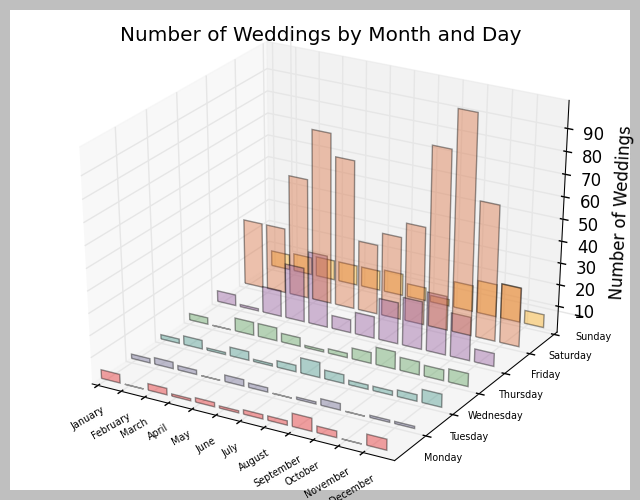

In [177]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color_list = plt.cm.Set1(np.linspace(0, 1, 12))

month_list = list(calendar.month_name)[1:]
for i, day in enumerate(calendar.day_name):
    counts = [monthday_counts.get((month, day),0) for month in month_list]
    ax.bar(range(12), counts, zs=i, zdir='y', color=color_list[i], alpha=0.4)
    

ax.set_zlabel('Number of Weddings')
ax.set_zticks(range(10,100,10))
ax.set_xticks(range(12))
ax.set_xticklabels(month_list, size='xx-small', rotation=30)
ax.set_yticks(range(8)[1:])
ax.set_yticklabels(list(calendar.day_name), size='xx-small')

ax.set_title('Number of Weddings by Month and Day')

plt.savefig('daymonth.png',format='png')
#plt.show()


In [149]:
time_list = list('{} am'.format(i) for i in range(1,13)) + list('{} pm'.format(i) for i in range(1,13))
time_list

['1 am',
 '2 am',
 '3 am',
 '4 am',
 '5 am',
 '6 am',
 '7 am',
 '8 am',
 '9 am',
 '10 am',
 '11 am',
 '12 am',
 '1 pm',
 '2 pm',
 '3 pm',
 '4 pm',
 '5 pm',
 '6 pm',
 '7 pm',
 '8 pm',
 '9 pm',
 '10 pm',
 '11 pm',
 '12 pm']

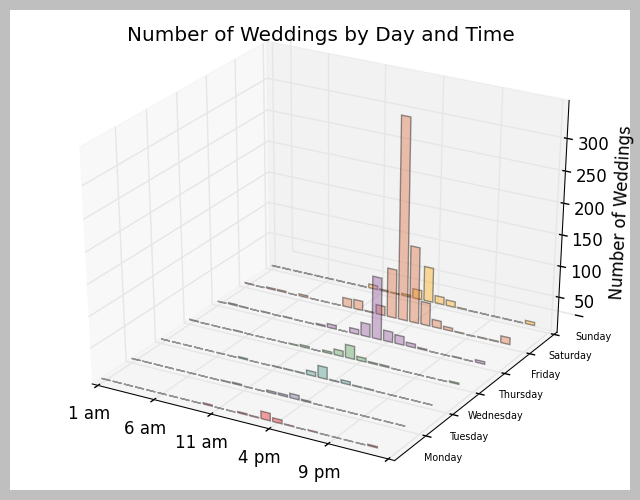

In [178]:
daytime_grouped = raw.groupby(['Day','Time'])
daytime_counts = daytime_grouped.size()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color_list = plt.cm.Set1(np.linspace(0, 1, 12))

day_list = list(calendar.day_name)
time_list = list('{} am'.format(i) for i in range(1,13)) + list('{} pm'.format(i) for i in range(1,13))
for i, day in enumerate(calendar.day_name):
    counts = [daytime_counts.get((day, t),0) for t in time_list]
    ax.bar(range(24), counts, zs=i, zdir='y', color=color_list[i], alpha=0.4)
    

ax.set_zlabel('Number of Weddings')
ax.set_zticks(range(50,350,50))
ax.set_title('Number of Weddings by Day and Time')
ax.set_xticklabels(['1 am','6 am','11 am','4 pm','9 pm',''])
ax.set_yticks(range(8)[1:])
ax.set_yticklabels(day_list, size='xx-small')

plt.savefig('daytime.png',format='png')
#plt.show()


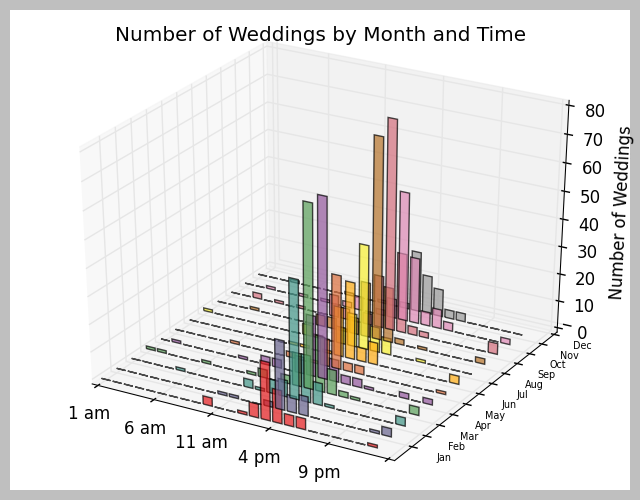

In [179]:
monthtime_grouped = raw.groupby(['Month','Time'])
monthtime_counts = monthtime_grouped.size()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color_list = plt.cm.Set1(np.linspace(0, 1, 12))

month_list = list(calendar.month_name)[1:]
#time_list = list('{} am'.format(i) for i in range(1,13)) + list('{} pm'.format(i) for i in range(1,13))
for i, month in enumerate(month_list):
    counts = [monthtime_counts.get((month, t),0) for t in time_list]
    ax.bar(range(24), counts, zs=i, zdir='y', color=color_list[i], alpha=0.7)
    

ax.set_zlabel('Number of Weddings')
#ax.set_zticks(range(50,350,50))
ax.set_title('Number of Weddings by Month and Time')
ax.set_xticklabels(['1 am','6 am','11 am','4 pm','9 pm',''])
ax.set_yticks(range(1,14))
ax.set_yticklabels(list(calendar.month_abbr), size='xx-small')

plt.savefig('monthtime.png',format='png')
plt.show()
